# Importance of nodes in the network

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Reading in datasets/book1.csv
book1 = pd.read_csv('book1.csv')

# Printing out the head of the dataset
print(book1.head())


                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [5]:
G_book1 = nx.Graph()
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [7]:
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [57]:
# 检查每个元素是否是NetworkX图对象
for i, book in enumerate(books):
    if not isinstance(book, nx.Graph):
        print(f"Error: books[{i}] is not a NetworkX Graph object. It is of type {type(book)}.")

# 1. Degree Centrality

In [13]:
# Calculating the degree centrality of books
def calculate_and_sort_degree_centrality(graph):
    deg_cen = nx.degree_centrality(graph)
    sorted_deg_cen = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_deg_cen

# 计算所有书籍的度中心性并排序
sorted_deg_cen_books = [calculate_and_sort_degree_centrality(book) for book in books]

# 将结果转换为 DataFrame 并存储在一个字典中
sorted_deg_cen_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_deg_cen_books[i], columns=["Node", "Degree Centrality"])
    for i in range(len(books))
}

In [15]:
df1_1 = sorted_deg_cen_dfs["book1"]
df1_1

,Node,Degree Centrality
0,Eddard-Stark,0.354839
1,Robert-Baratheon,0.268817
2,Tyrion-Lannister,0.247312
3,Catelyn-Stark,0.231183
4,Jon-Snow,0.198925
5,Robb-Stark,0.188172
6,Sansa-Stark,0.188172
7,Bran-Stark,0.172043
8,Cersei-Lannister,0.161290
9,Joffrey-Baratheon,0.161290


In [17]:
df2_1 = sorted_deg_cen_dfs["book2"]
df2_1

,Node,Degree Centrality
0,Tyrion-Lannister,0.205426
1,Joffrey-Baratheon,0.182171
2,Cersei-Lannister,0.166667
3,Arya-Stark,0.155039
4,Stannis-Baratheon,0.143411
5,Robb-Stark,0.135659
6,Catelyn-Stark,0.127907
7,Theon-Greyjoy,0.124031
8,Renly-Baratheon,0.120155
9,Bran-Stark,0.116279


In [19]:
df3_1 = sorted_deg_cen_dfs["book3"]
df3_1

,Node,Degree Centrality
0,Tyrion-Lannister,0.195364
1,Jon-Snow,0.172185
2,Joffrey-Baratheon,0.165563
3,Robb-Stark,0.162252
4,Sansa-Stark,0.158940
5,Jaime-Lannister,0.149007
6,Catelyn-Stark,0.125828
7,Cersei-Lannister,0.125828
8,Arya-Stark,0.122517
9,Stannis-Baratheon,0.102649


In [21]:
df4_1 = sorted_deg_cen_dfs["book4"]
df4_1

,Node,Degree Centrality
0,Jaime-Lannister,0.234432
1,Cersei-Lannister,0.219780
2,Brienne-of-Tarth,0.102564
3,Tyrion-Lannister,0.095238
4,Margaery-Tyrell,0.091575
5,Sansa-Stark,0.087912
6,Tommen-Baratheon,0.087912
7,Samwell-Tarly,0.073260
8,Stannis-Baratheon,0.073260
9,Petyr-Baelish,0.069597


In [23]:
df5_1 = sorted_deg_cen_dfs["book5"]
df5_1

,Node,Degree Centrality
0,Jon-Snow,0.196203
1,Daenerys-Targaryen,0.183544
2,Stannis-Baratheon,0.148734
3,Tyrion-Lannister,0.104430
4,Theon-Greyjoy,0.104430
5,Cersei-Lannister,0.088608
6,Barristan-Selmy,0.079114
7,Hizdahr-zo-Loraq,0.069620
8,Asha-Greyjoy,0.056962
9,Melisandre,0.053797


In [25]:
df_all_1= pd.concat([df1_1.iloc[:, 0], df2_1.iloc[:, 0], df3_1.iloc[:, 0], df4_1.iloc[:, 0], df5_1.iloc[:, 0]])
df_all_1.tail()

5    Cersei-Lannister
6     Barristan-Selmy
7    Hizdahr-zo-Loraq
8        Asha-Greyjoy
9          Melisandre
Name: Node, dtype: object

In [27]:
# find duplicates
duplicates = df_all_1[df_all_1.duplicated(keep=False)].reset_index(drop=True)

# count duplicates
duplicate_counts = duplicates.value_counts()

#print("Duplicates：")
#print(duplicates)

print("\nCount Duplicates：")
print(duplicate_counts)


Count Duplicates：
Node
Tyrion-Lannister     5
Cersei-Lannister     5
Stannis-Baratheon    4
Catelyn-Stark        3
Jon-Snow             3
Robb-Stark           3
Sansa-Stark          3
Joffrey-Baratheon    3
Bran-Stark           2
Arya-Stark           2
Theon-Greyjoy        2
Jaime-Lannister      2
Name: count, dtype: int64


<Figure size 2000x2000 with 0 Axes>

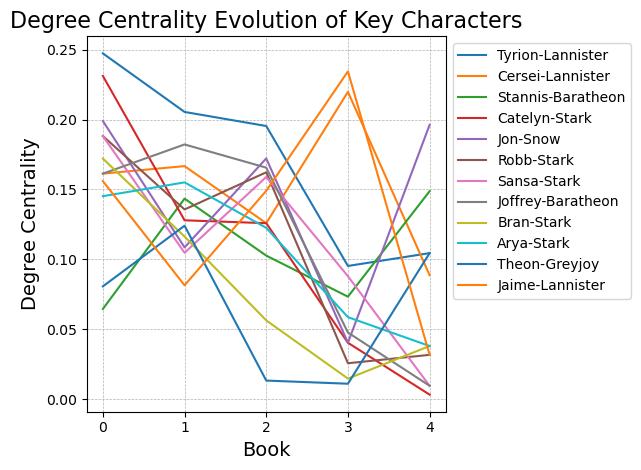

In [77]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

plt.figure(figsize=(20, 20))

# Plotting the degree centrality evolution of characters
degree_evol_df[['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon','Catelyn-Stark',
                'Jon-Snow','Robb-Stark','Sansa-Stark','Joffrey-Baratheon','Bran-Stark',
                'Arya-Stark','Theon-Greyjoy','Jaime-Lannister']].plot()

plt.title('Degree Centrality Evolution of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('Degree Centrality', fontsize=14)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

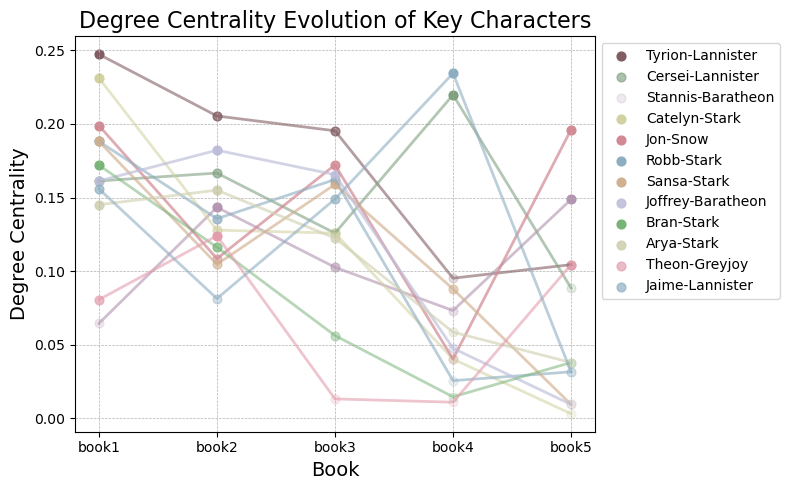

In [47]:
# create degree centrality list
evol = [nx.degree_centrality(book) for book in books]

degree_evol_df = pd.DataFrame.from_records(evol)

# set color
colors = {
    'Tyrion-Lannister': '#815C62',
    'Cersei-Lannister': '#7F9F7E',
    'Stannis-Baratheon': '#B293B0',
    'Catelyn-Stark': '#D1D1A2',
    'Jon-Snow': '#D18A94',
    'Robb-Stark': '#8DADC1',
    'Sansa-Stark': '#D1B08F',
    'Joffrey-Baratheon': '#BFBFDB',
    'Bran-Stark': '#78B378',
    'Arya-Stark': '#D1D1B4',
    'Theon-Greyjoy': '#E39DAD',
    'Jaime-Lannister': '#8DADC1'
}

# Define a function to calculate transparency
def calculate_alpha(values, base_alpha=0.2):
    min_val = np.min(values)
    max_val = np.max(values)
    range_val = max_val - min_val
    if range_val == 0:
        return [base_alpha] * len(values)
    return [(v - min_val) / range_val * (0.8) + base_alpha for v in values]

# plot figure
plt.figure(figsize=(8, 5))

for character in ['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon',
                 'Catelyn-Stark', 'Jon-Snow', 'Robb-Stark', 'Sansa-Stark',
                 'Joffrey-Baratheon', 'Bran-Stark', 'Arya-Stark',
                 'Theon-Greyjoy', 'Jaime-Lannister']:
    # get transparency
    alphas = calculate_alpha(degree_evol_df[character])
    # get character's degree centrality
    y_values = degree_evol_df[character]
    x_values = range(len(y_values))
    
    for x, y, alpha in zip(x_values, y_values, alphas):
        plt.scatter(x, y, color=colors[character], alpha=alpha, s=40, label=character if x == 0 else "")  # s参数控制点的大小
    
    # Draw line segments connecting points, using average transparency
    avg_alpha = sum(alphas) / len(alphas)
    plt.plot(x_values, y_values, color=colors[character], alpha=avg_alpha, lw=2, label=character if x == 0 else "")  # lw参数控制线宽

# Add a title and tags
plt.title('Degree Centrality Evolution of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('Degree Centrality', fontsize=14)

plt.xticks(ticks=x_values, labels=['book1', 'book2', 'book3', 'book4', 'book5'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 2.Betweenness Centrality

In [35]:
# 定义一个函数来计算和排序介数中心性
def calculate_and_sort_betweenness_centrality(graph):
    betweenness_cen = nx.betweenness_centrality(graph)
    sorted_betweenness_cen = sorted(betweenness_cen.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_betweenness_cen

# 计算所有书籍的介数中心性并排序
sorted_betweenness_cen_books = [calculate_and_sort_betweenness_centrality(book) for book in books]

# 将结果转换为 DataFrame 并存储在一个字典中
sorted_betweenness_cen_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_betweenness_cen_books[i], columns=["Node", "Betweenness Centrality"])
    for i in range(len(books))
}

In [37]:
df1_2 = sorted_betweenness_cen_dfs["book1"]
df1_2

,Node,Betweenness Centrality
0,Eddard-Stark,0.269604
1,Robert-Baratheon,0.214030
2,Tyrion-Lannister,0.190212
3,Jon-Snow,0.171581
4,Catelyn-Stark,0.151395
5,Daenerys-Targaryen,0.086270
6,Robb-Stark,0.072984
7,Drogo,0.064812
8,Bran-Stark,0.055800
9,Sansa-Stark,0.037145


In [39]:
df2_2 = sorted_betweenness_cen_dfs["book2"]
df2_2

,Node,Betweenness Centrality
0,Arya-Stark,0.188112
1,Jon-Snow,0.174440
2,Robb-Stark,0.164941
3,Tyrion-Lannister,0.155324
4,Robert-Baratheon,0.153744
5,Theon-Greyjoy,0.144395
6,Stannis-Baratheon,0.119514
7,Bran-Stark,0.113235
8,Catelyn-Stark,0.111044
9,Joffrey-Baratheon,0.090782


In [41]:
df3_2 = sorted_betweenness_cen_dfs["book3"]
df3_2

,Node,Betweenness Centrality
0,Jon-Snow,0.223829
1,Robert-Baratheon,0.166435
2,Robb-Stark,0.162321
3,Tyrion-Lannister,0.154091
4,Joffrey-Baratheon,0.141891
5,Daenerys-Targaryen,0.136491
6,Jaime-Lannister,0.124491
7,Stannis-Baratheon,0.109017
8,Arya-Stark,0.094787
9,Sansa-Stark,0.089603


In [43]:
df4_2 = sorted_betweenness_cen_dfs["book4"]
df4_2

,Node,Betweenness Centrality
0,Stannis-Baratheon,0.276306
1,Cersei-Lannister,0.275480
2,Jaime-Lannister,0.242819
3,Balon-Greyjoy,0.190597
4,Sansa-Stark,0.152754
5,Samwell-Tarly,0.140178
6,Brienne-of-Tarth,0.109834
7,Arya-Stark,0.108119
8,Myrcella-Baratheon,0.107331
9,Tyrion-Lannister,0.091159


In [45]:
df5_2 = sorted_betweenness_cen_dfs["book5"]
df5_2

,Node,Betweenness Centrality
0,Stannis-Baratheon,0.452831
1,Daenerys-Targaryen,0.295946
2,Jon-Snow,0.244849
3,Tyrion-Lannister,0.209616
4,Robert-Baratheon,0.177169
5,Cersei-Lannister,0.155657
6,Theon-Greyjoy,0.109959
7,Asha-Greyjoy,0.089418
8,Eddard-Stark,0.073434
9,Doran-Martell,0.052868


In [51]:
df_all_2= pd.concat([df1_2.iloc[:, 0], df2_2.iloc[:, 0], df3_2.iloc[:, 0], df4_2.iloc[:, 0], df5_2.iloc[:, 0]])

# find duplicates
duplicates_2 = df_all_2[df_all_2.duplicated(keep=False)].reset_index(drop=True)

# count duplicates
duplicate_counts_2 = duplicates_2.value_counts()

#print("Duplicates")
#print(duplicates_2)

print("\nCount Duplicates：")
print(duplicate_counts_2)


Count Duplicates：
Node
Tyrion-Lannister      5
Robert-Baratheon      4
Jon-Snow              4
Stannis-Baratheon     4
Daenerys-Targaryen    3
Robb-Stark            3
Sansa-Stark           3
Arya-Stark            3
Eddard-Stark          2
Catelyn-Stark         2
Bran-Stark            2
Theon-Greyjoy         2
Joffrey-Baratheon     2
Jaime-Lannister       2
Cersei-Lannister      2
Name: count, dtype: int64


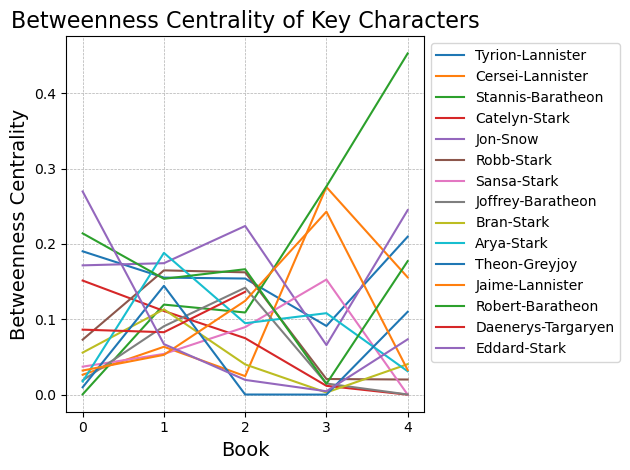

In [55]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol_2 = [nx.betweenness_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol_2)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon','Catelyn-Stark',
                'Jon-Snow','Robb-Stark','Sansa-Stark','Joffrey-Baratheon','Bran-Stark',
                'Arya-Stark','Theon-Greyjoy','Jaime-Lannister',
                'Robert-Baratheon','Daenerys-Targaryen','Eddard-Stark']].plot()
plt.title('Betweenness Centrality of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('Betweenness Centrality', fontsize=14)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# 3.Closeness Centrality

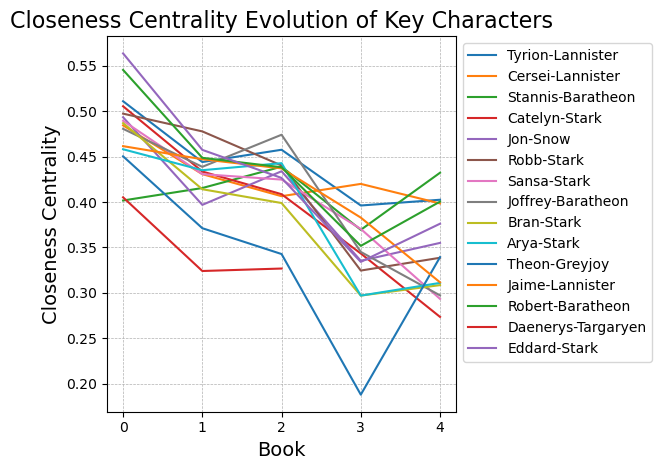

In [57]:
def calculate_and_sort_closeness_centrality(graph):
    closeness_cen = nx.closeness_centrality(graph)
    sorted_closeness_cen = sorted(closeness_cen.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_closeness_cen


sorted_closeness_cen_books = [calculate_and_sort_closeness_centrality(book) for book in books]


sorted_closeness_cen_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_closeness_cen_books[i], columns=["Node", "Closeness Centrality"])
    for i in range(len(books))
}


closeness_evol_df = pd.DataFrame.from_records([nx.closeness_centrality(book) for book in books])
closeness_evol_df[['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon', 'Catelyn-Stark',
                   'Jon-Snow', 'Robb-Stark', 'Sansa-Stark', 'Joffrey-Baratheon', 'Bran-Stark',
                   'Arya-Stark', 'Theon-Greyjoy', 'Jaime-Lannister',
                   'Robert-Baratheon', 'Daenerys-Targaryen', 'Eddard-Stark']].plot()

plt.title('Closeness Centrality Evolution of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('Closeness Centrality', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 4.Eigenvector Centrality

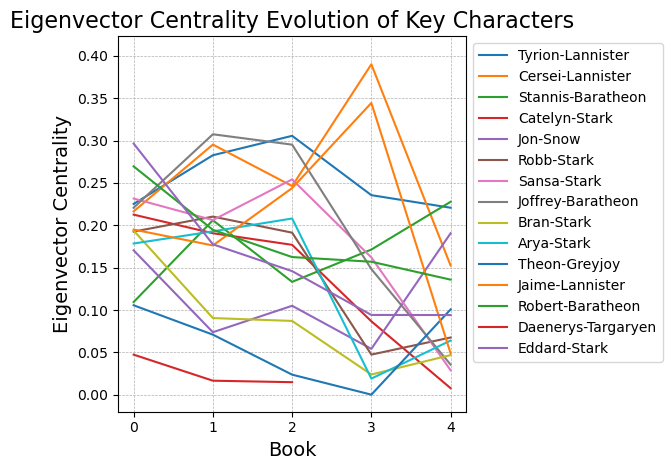

In [59]:
def calculate_and_sort_eigenvector_centrality(graph):
    eigenvector_cen = nx.eigenvector_centrality_numpy(graph)
    sorted_eigenvector_cen = sorted(eigenvector_cen.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_eigenvector_cen


sorted_eigenvector_cen_books = [calculate_and_sort_eigenvector_centrality(book) for book in books]


sorted_eigenvector_cen_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_eigenvector_cen_books[i], columns=["Node", "Eigenvector Centrality"])
    for i in range(len(books))
}


eigenvector_evol_df = pd.DataFrame.from_records([nx.eigenvector_centrality_numpy(book) for book in books])
eigenvector_evol_df[['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon', 'Catelyn-Stark',
                     'Jon-Snow', 'Robb-Stark', 'Sansa-Stark', 'Joffrey-Baratheon', 'Bran-Stark',
                     'Arya-Stark', 'Theon-Greyjoy', 'Jaime-Lannister',
                     'Robert-Baratheon', 'Daenerys-Targaryen', 'Eddard-Stark']].plot()

plt.title('Eigenvector Centrality Evolution of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('Eigenvector Centrality', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 5.PageRank

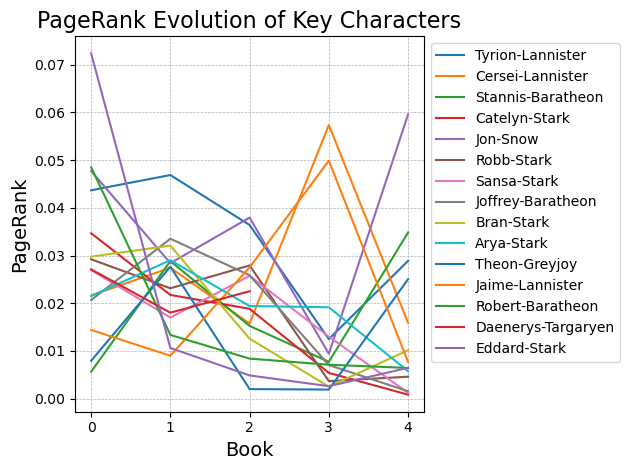

In [61]:
def calculate_and_sort_pagerank(graph):
    pagerank = nx.pagerank(graph)
    sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_pagerank

sorted_pagerank_books = [calculate_and_sort_pagerank(book) for book in books]

sorted_pagerank_dfs = {
    f"book{i+1}": pd.DataFrame(sorted_pagerank_books[i], columns=["Node", "PageRank"])
    for i in range(len(books))
}

pagerank_evol_df = pd.DataFrame.from_records([nx.pagerank(book) for book in books])
pagerank_evol_df[['Tyrion-Lannister', 'Cersei-Lannister', 'Stannis-Baratheon', 'Catelyn-Stark',
                  'Jon-Snow', 'Robb-Stark', 'Sansa-Stark', 'Joffrey-Baratheon', 'Bran-Stark',
                  'Arya-Stark', 'Theon-Greyjoy', 'Jaime-Lannister',
                  'Robert-Baratheon', 'Daenerys-Targaryen', 'Eddard-Stark']].plot()

plt.title('PageRank Evolution of Key Characters', fontsize=16)
plt.xlabel('Book', fontsize=14)
plt.ylabel('PageRank', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 6.Local Clustering Coefficient

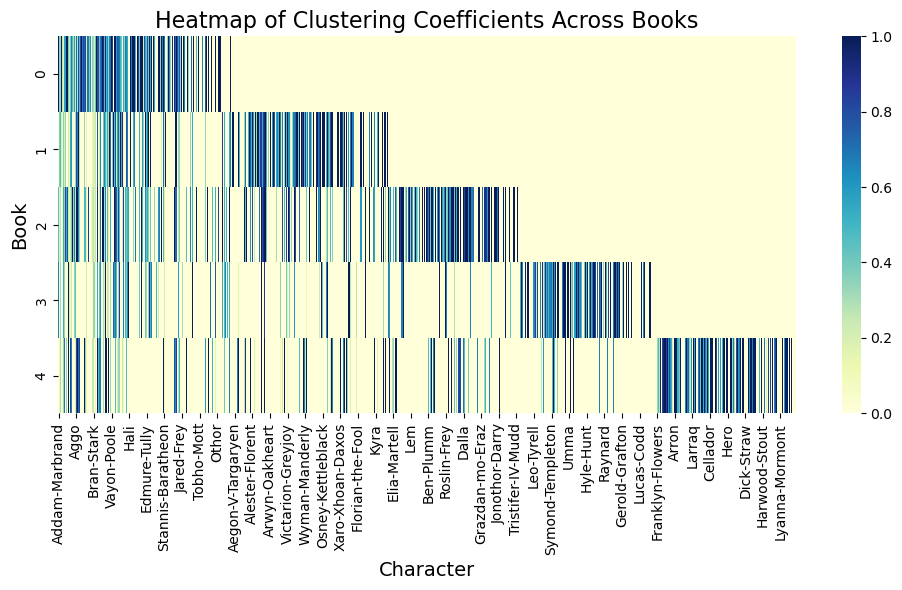

In [119]:
import seaborn as sns

clustering_coefficients = [nx.clustering(book) for book in books]

clustering_coefficients_df = pd.DataFrame(clustering_coefficients).fillna(0)  # 填充缺失值以保持形状一致

plt.figure(figsize=(10, 6))
sns.heatmap(clustering_coefficients_df, cmap="YlGnBu", annot=False)
plt.title('Heatmap of Clustering Coefficients Across Books', fontsize=16)
plt.xlabel('Character', fontsize=14)
plt.ylabel('Book', fontsize=14)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

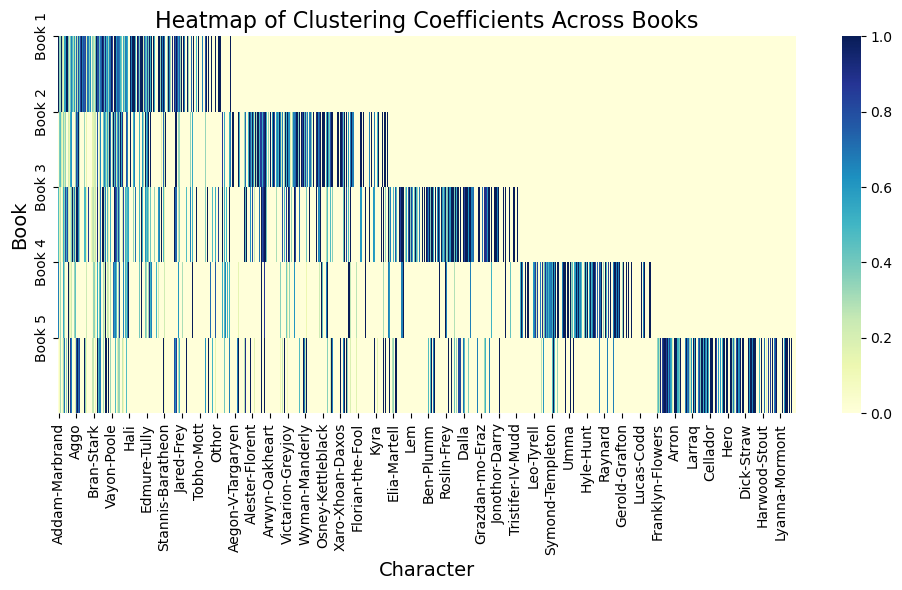

In [135]:
clustering_coefficients = [nx.clustering(book) for book in books]
clustering_coefficients_df = pd.DataFrame(clustering_coefficients).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(clustering_coefficients_df, cmap="YlGnBu", annot=False)

# Replace y-axis labels with book names
plt.yticks([0,1,2,3,4], ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5'])
plt.title('Heatmap of Clustering Coefficients Across Books', fontsize=16)
plt.xlabel('Character', fontsize=14)
plt.ylabel('Book', fontsize=14)
plt.tight_layout()

plt.show()